In [1]:
import numpy as np
import scipy as sc
import pandas as pd
from data.dataimport import dataimport
from models.conformal_nex import Conformal_nex
from models.conformal_nxg import Conformal_nxg
from models.conformal_std import Conformal_std
from models.forest_qr import RanForestQuantile

In [2]:
# Import the data
inp_data, forecasts, measurements, fcdates = dataimport()

In [3]:
conf_nex = Conformal_nex(0.99)
conf_nex.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] = conf_nex.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

0.9705882352941176


In [4]:
conf_std = Conformal_std()
conf_std.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] = conf_std.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

0.9558823529411765


In [5]:
conf_nxg = Conformal_nxg(0.98, 0.95, np.array([0.01, 0.01]), 2)
conf_nxg.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] =conf_nxg.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

0.9852941176470589


In [6]:
fqr = RanForestQuantile()
fqr.calibrate(inp_data[0],forecasts[0],measurements[0])
pred = np.empty((len(forecasts[1]),2))
for i in range(len(forecasts[1])):
    pred[i,:] =fqr.predict(inp_data[1][i,:],forecasts[1][i])
print(str(np.sum((np.squeeze(measurements[1]) > pred[:,0]) & (np.squeeze(measurements[1]) < pred[:,1]))/len(forecasts[1])))

0.9852941176470589


In [7]:
conf_nex = Conformal_nex(0.99)
conf_nex.calibrate(inp_data[0][:20],forecasts[0][:20],measurements[0][:20])
conf_nex.calibrate(inp_data[0][20:],forecasts[0][20:],measurements[0][20:])


In [8]:
from mod_tr_schedule import train_schedule

In [9]:
mod_params = [{'forget_factor':0.99}, {'forget_factor':0.98}]
pred, mods = train_schedule(Conformal_nex, mod_params, inp_data[0], forecasts[0], measurements[0], inp_data[1], forecasts[1], measurements[1], num_splits=5, confidence=0.9)

[[ 8.52009811 14.47174416]
 [ 3.73091793 10.36588001]
 [ 3.70676804 10.34173012]
 [ 6.59131374 12.54295979]
 [ 3.40268507  9.35433111]
 [ 5.13223238 10.97851591]
 [ 7.90545311 13.85709915]
 [10.6291584  16.58080444]
 [ 7.84066362 13.68694715]
 [ 6.52815218 12.37443571]
 [ 4.35511055 10.30675659]
 [ 4.78556442 11.4205265 ]
 [ 5.25246429 11.88742638]
 [ 2.3891696   8.54067144]
 [ 5.13904705 11.2905489 ]
 [ 1.78827753  7.73992357]
 [ 3.04156961  8.99321566]
 [10.06678171 15.91306524]
 [12.60167761 18.44796114]
 [ 6.51476345 11.84202518]
 [ 1.99457207  7.94621811]
 [ 8.7908144  15.42577648]
 [10.54245224 16.69395409]
 [ 2.22529402  8.37679586]
 [ 4.3366188  10.48812065]
 [ 0.98731508  7.13881693]
 [ 2.79800024  8.94950209]
 [ 9.0554718  15.20697365]
 [ 4.45472183 10.40636787]
 [10.84165802 16.79330406]
 [12.45122757 18.40287361]
 [ 7.88107624 13.83272228]
 [13.36485996 19.316506  ]
 [-0.96779172  4.87849181]
 [ 3.40318098  9.35482702]
 [ 5.76054611 11.71219215]
 [ 6.11157484 11.95785837]
 

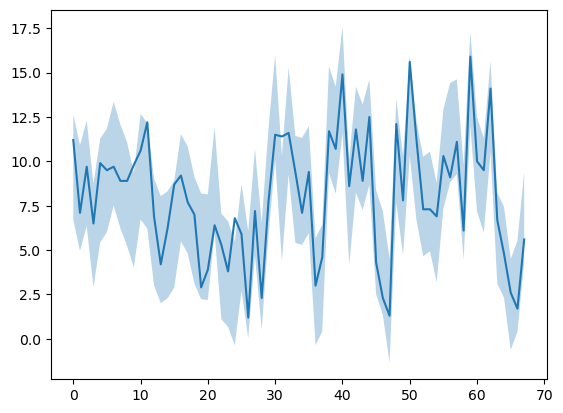

In [11]:
import matplotlib.pyplot as plt
plt.plot(measurements[1])
plt.fill_between(range(len(measurements[1])),pred[:,0], y2 = pred[:,1], alpha = 0.3)